# <center><span style="color:red; font-weight:bold;">PredictiveBankChurn: Automated Customer Attrition Forecasting with H2O AutoML</span></center>


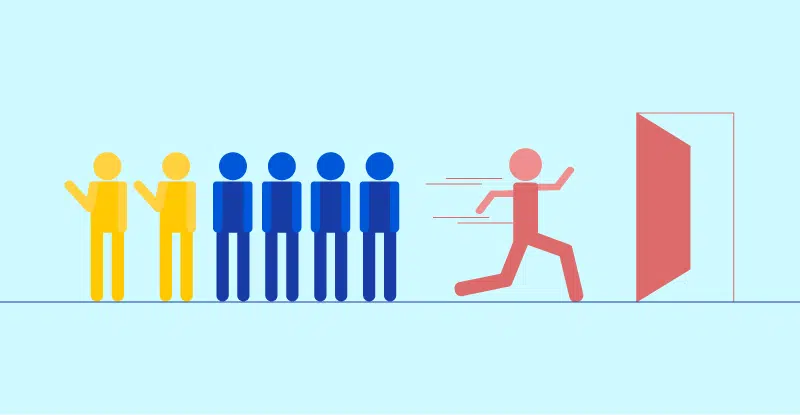

# Project Overview:

## Context:
Churn, a measure of customer inactivity or disengagement over time, is evident through various data facets such as the recency of account actions or shifts in the account balance.

## Aim:
This study seeks to achieve the following objectives:

- **Identify and Visualize Factors Influencing Customer Churn:**
  Explore and visually represent the factors contributing to customer churn.

- **Build a Predictive Model:**
  Develop a predictive model with the following goals:

  - Classify customers into churn or non-churn categories.
  - Ideally, select a model that assigns a probability to churn, facilitating targeted customer service efforts.

## Approach:
Utilizing Artificial Neural Network (ANN) models and H2O AutoML, we aim to leverage advanced techniques for accurate predictions.

## Project Timeline:
1. **Data Analysis:**
   Thoroughly analyze the dataset to gain insights into the underlying patterns and characteristics.

2. **Feature Engineering:**
   Enhance the dataset by extracting meaningful features to improve model performance.

3. **ANN Model Building:**
   Develop and train Artificial Neural Network models to classify customer churn.

4. **H2O AutoML Model Building and Prediction:**
   Employ H2O AutoML for comprehensive model exploration and prediction, considering its automation capabilities.

This structured approach ensures a systematic progression from data exploration to advanced model building, providing valuable insights into customer churn dynamics.


## **1. Importing Libraries:**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore") 

## **2. Data Ingestion:**

In [2]:
df = pd.read_csv("D:\Bank+Customer+Churn-Auto+Keras+-Project+code+and+Files\Project code and Files\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# **3. Advanced Exploratory Data Analysis (EDA):**

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

#### We aim to generate a graphical representation in the form of a Pie Chart

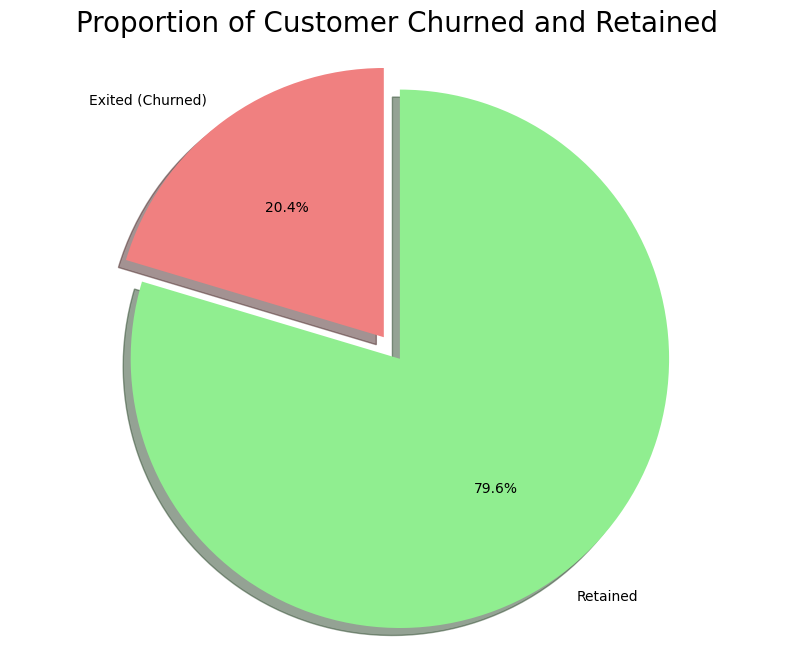

In [12]:
# Data for the Pie Chart
labels = ['Exited (Churned)', 'Retained']
sizes = [df['Exited'].value_counts()[1], df['Exited'].value_counts()[0]]
explode = (0, 0.1)

# Creating the Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['lightcoral', 'lightgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding Title and Adjusting Font Size
plt.title("Proportion of Customer Churned and Retained", size=20)

# Displaying the Pie Chart
plt.show()

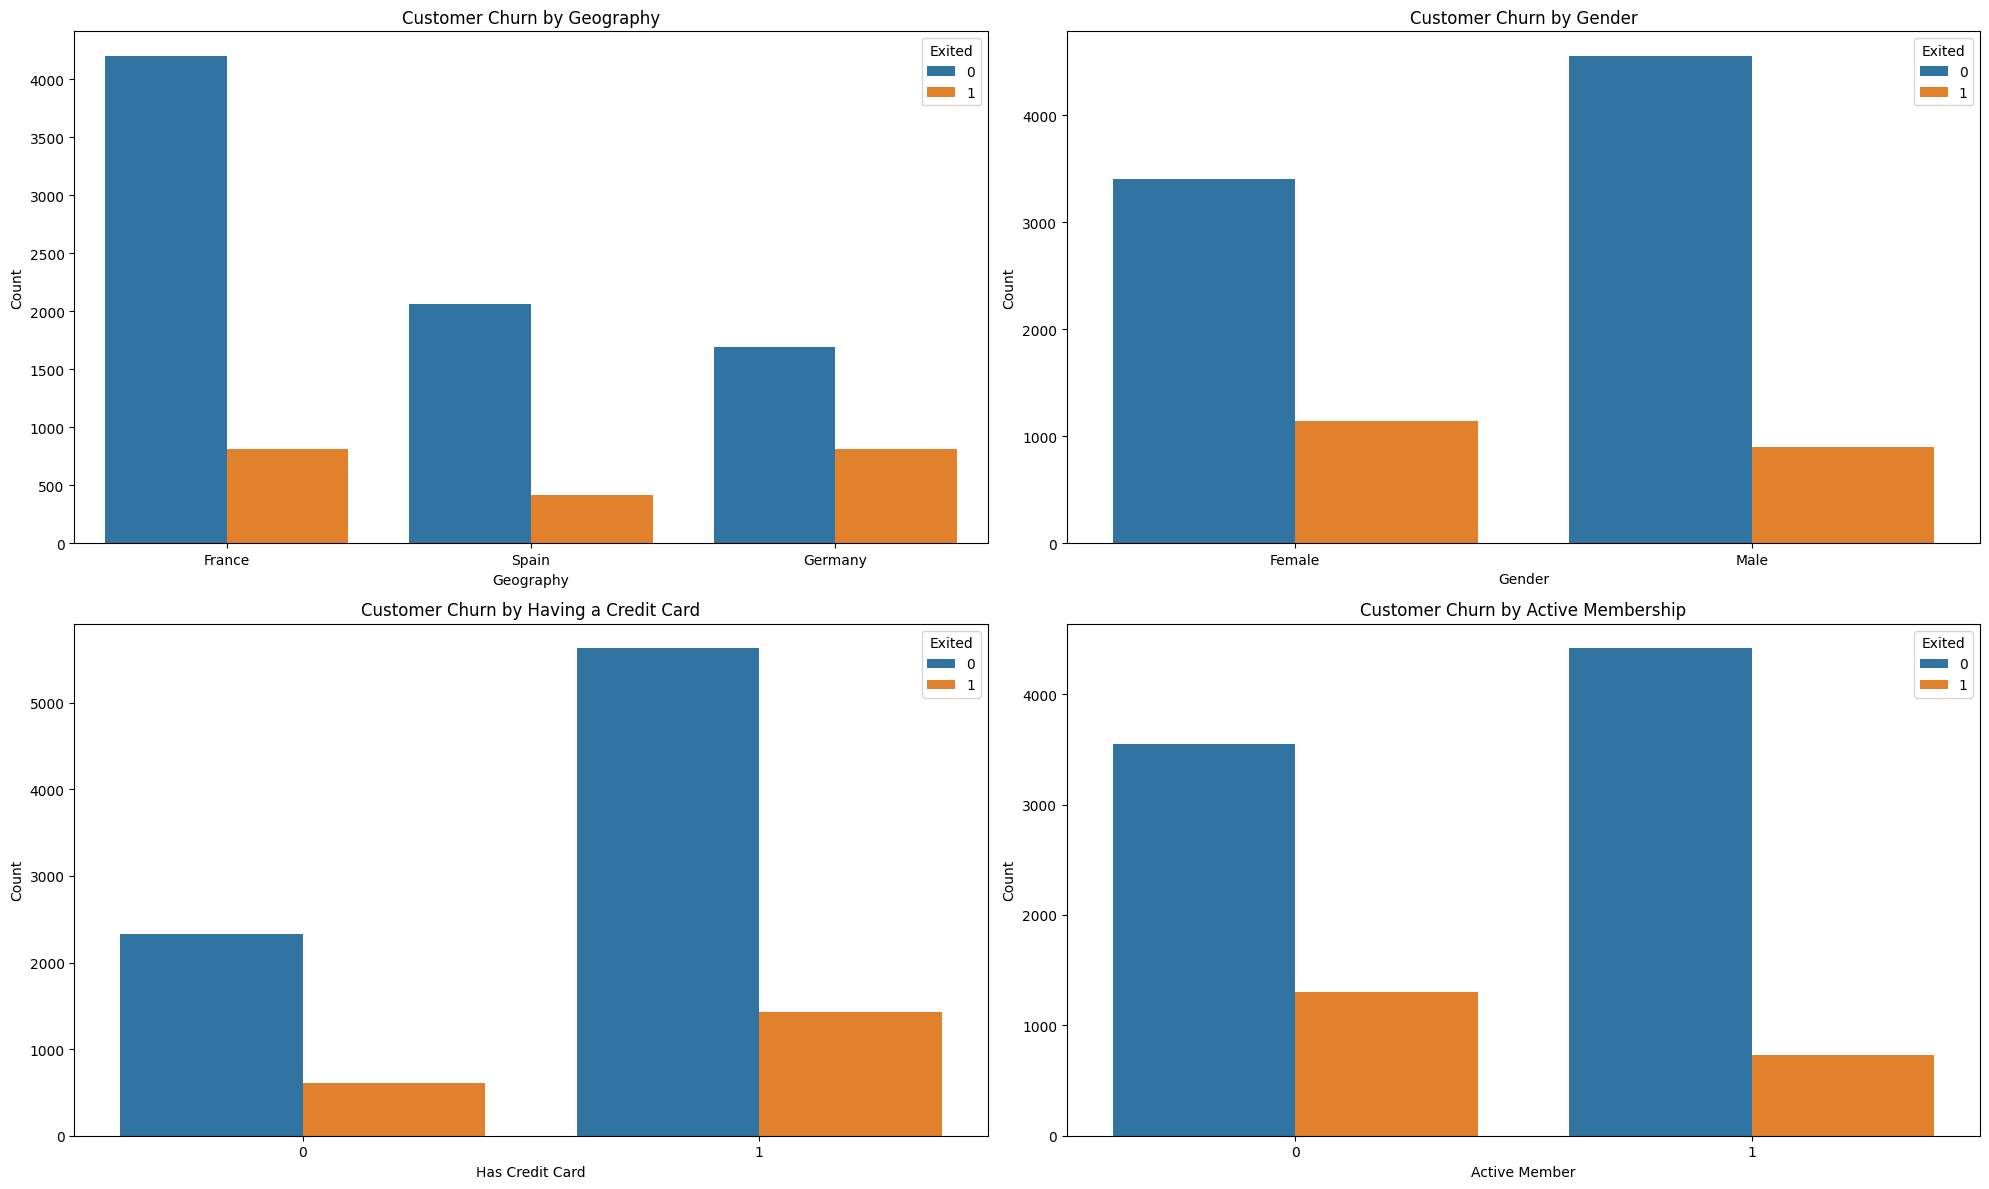

In [11]:
# Reviewing the 'Status' relationship with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# Plotting 'Geography' vs. 'Exited'
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
axarr[0][0].set_title('Customer Churn by Geography')
axarr[0][0].set_xlabel('Geography')
axarr[0][0].set_ylabel('Count')

# Plotting 'Gender' vs. 'Exited'
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
axarr[0][1].set_title('Customer Churn by Gender')
axarr[0][1].set_xlabel('Gender')
axarr[0][1].set_ylabel('Count')

# Plotting 'HasCrCard' vs. 'Exited'
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
axarr[1][0].set_title('Customer Churn by Having a Credit Card')
axarr[1][0].set_xlabel('Has Credit Card')
axarr[1][0].set_ylabel('Count')

# Plotting 'IsActiveMember' vs. 'Exited'
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])
axarr[1][1].set_title('Customer Churn by Active Membership')
axarr[1][1].set_xlabel('Active Member')
axarr[1][1].set_ylabel('Count')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

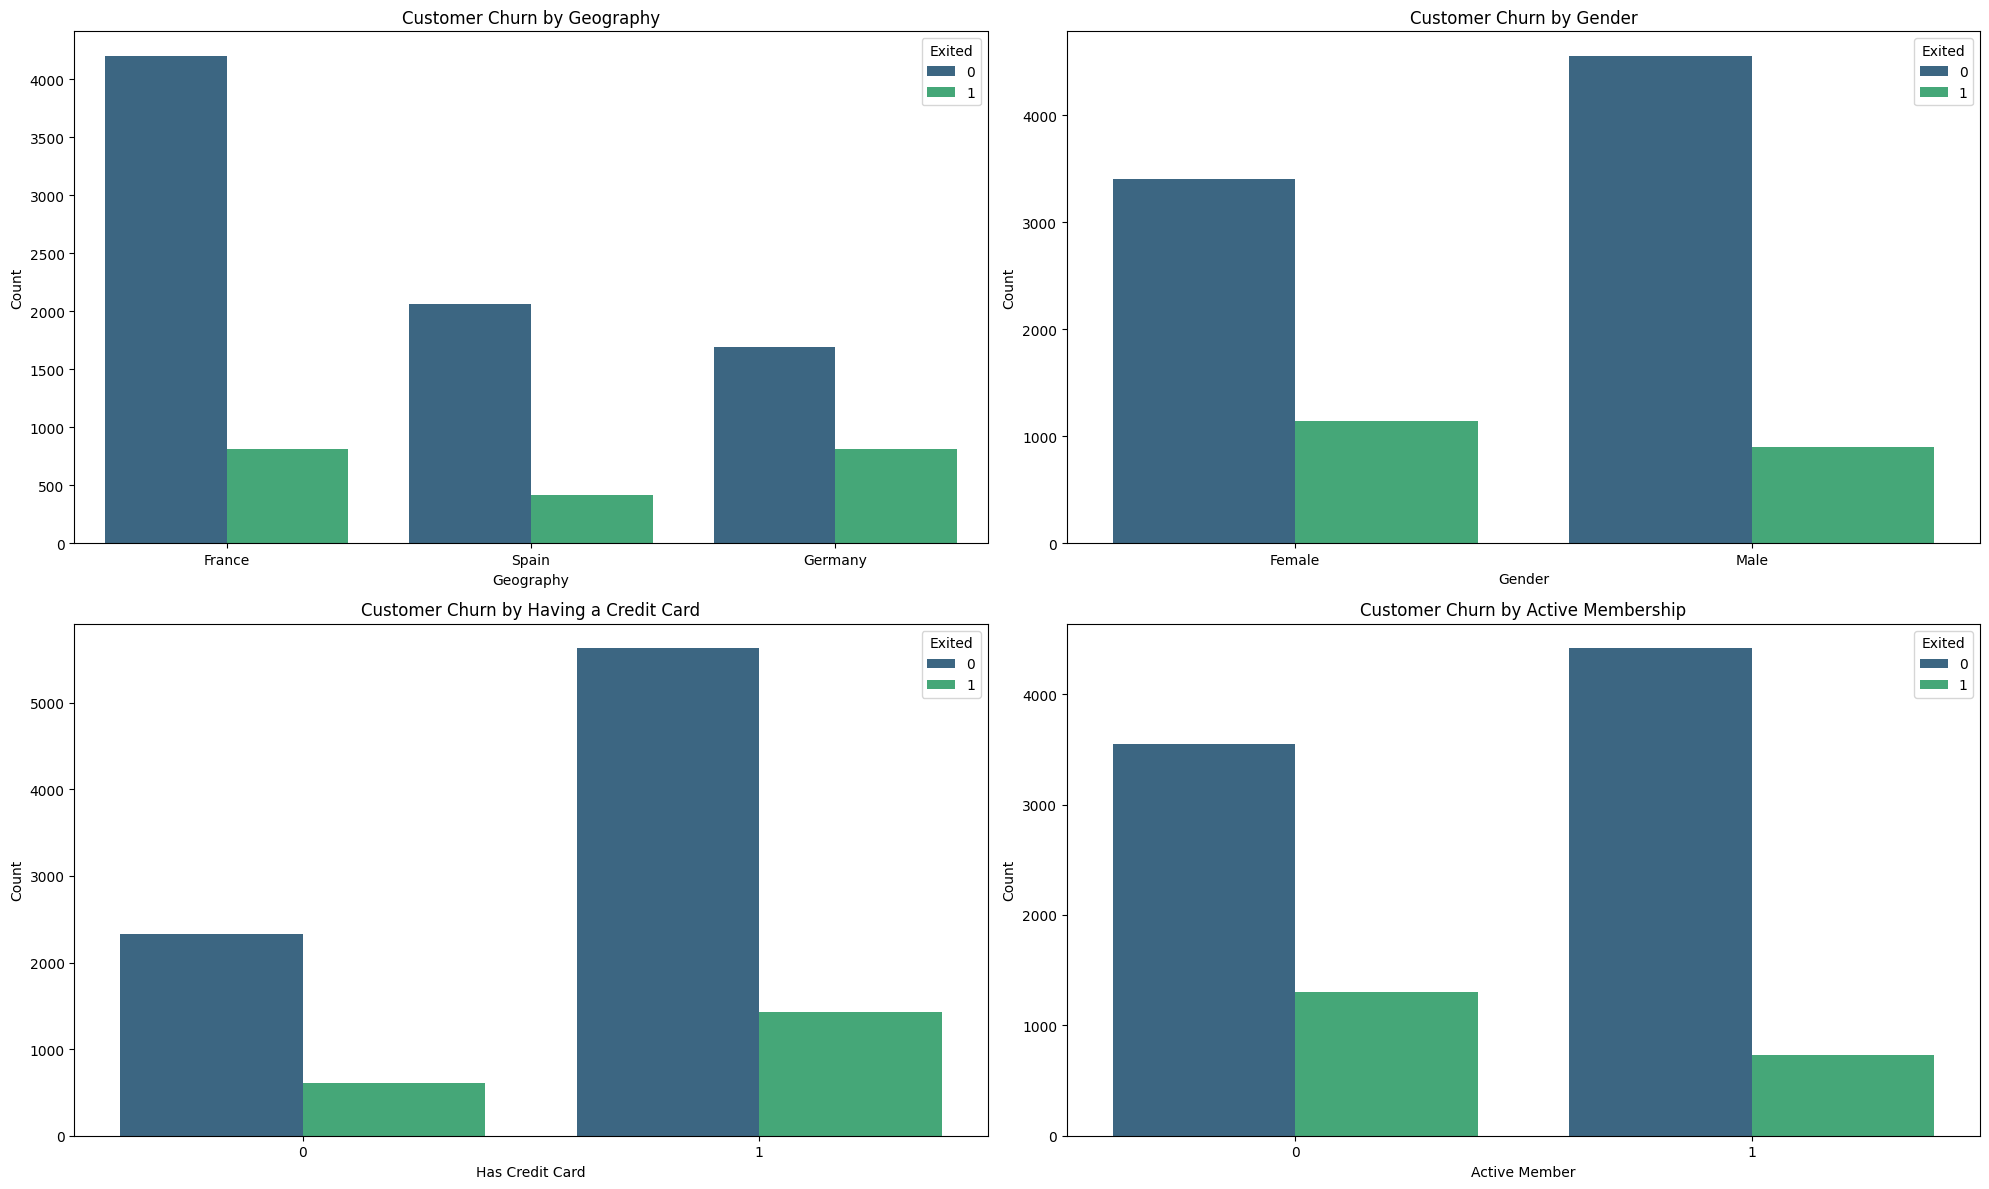

In [13]:
# Reviewing the 'Status' relationship with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# Plotting 'Geography' vs. 'Exited'
sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0], palette='viridis')
axarr[0][0].set_title('Customer Churn by Geography')
axarr[0][0].set_xlabel('Geography')
axarr[0][0].set_ylabel('Count')
axarr[0][0].legend(title='Exited', loc='upper right')

# Plotting 'Gender' vs. 'Exited'
sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1], palette='viridis')
axarr[0][1].set_title('Customer Churn by Gender')
axarr[0][1].set_xlabel('Gender')
axarr[0][1].set_ylabel('Count')
axarr[0][1].legend(title='Exited', loc='upper right')

# Plotting 'HasCrCard' vs. 'Exited'
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0], palette='viridis')
axarr[1][0].set_title('Customer Churn by Having a Credit Card')
axarr[1][0].set_xlabel('Has Credit Card')
axarr[1][0].set_ylabel('Count')
axarr[1][0].legend(title='Exited', loc='upper right')

# Plotting 'IsActiveMember' vs. 'Exited'
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1], palette='viridis')
axarr[1][1].set_title('Customer Churn by Active Membership')
axarr[1][1].set_xlabel('Active Member')
axarr[1][1].set_ylabel('Count')
axarr[1][1].legend(title='Exited', loc='upper right')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

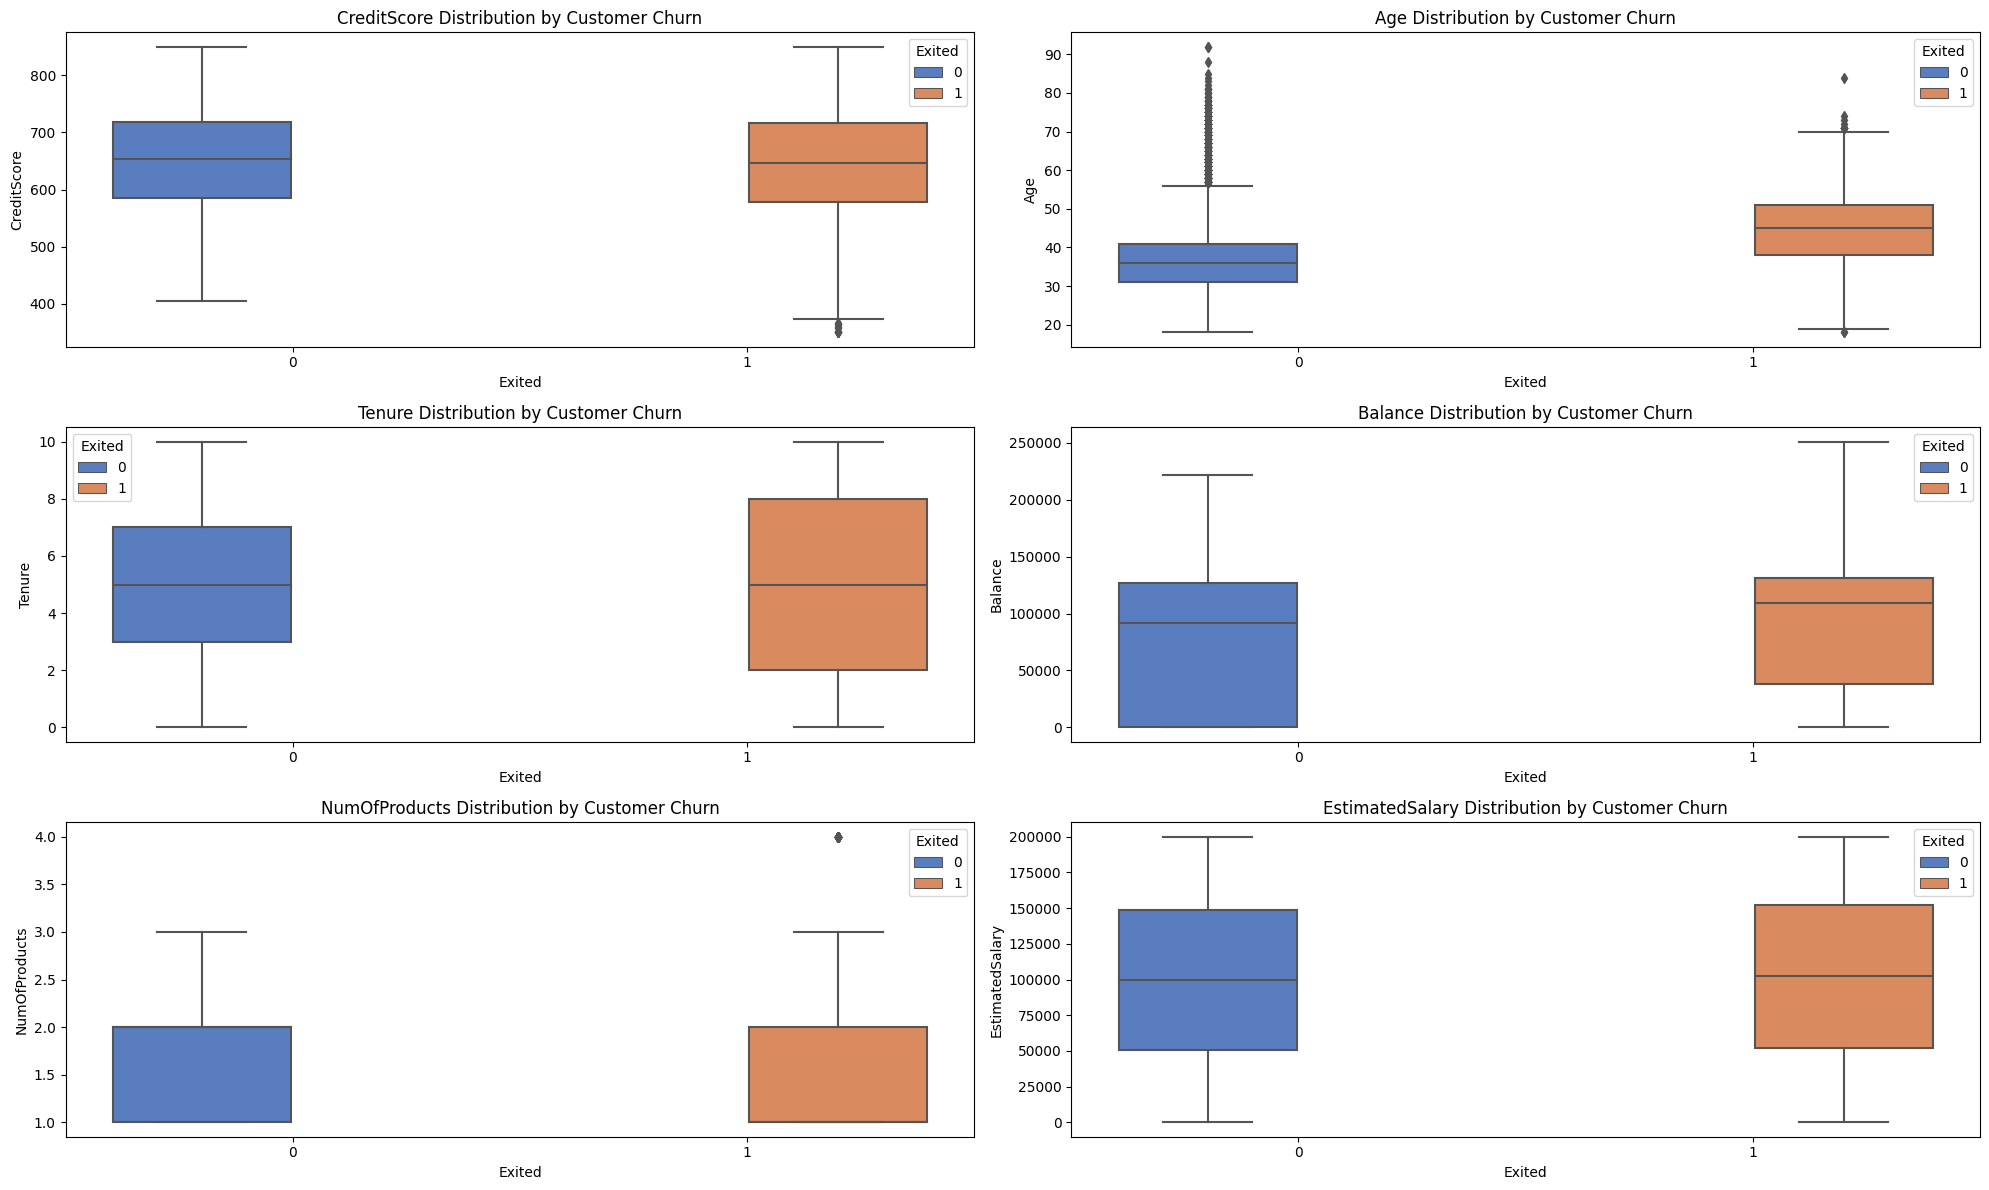

In [14]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))

# Plotting 'CreditScore' vs. 'Exited'
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0], palette='muted')
axarr[0][0].set_title('CreditScore Distribution by Customer Churn')
axarr[0][0].set_xlabel('Exited')
axarr[0][0].set_ylabel('CreditScore')

# Plotting 'Age' vs. 'Exited'
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1], palette='muted')
axarr[0][1].set_title('Age Distribution by Customer Churn')
axarr[0][1].set_xlabel('Exited')
axarr[0][1].set_ylabel('Age')

# Plotting 'Tenure' vs. 'Exited'
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0], palette='muted')
axarr[1][0].set_title('Tenure Distribution by Customer Churn')
axarr[1][0].set_xlabel('Exited')
axarr[1][0].set_ylabel('Tenure')

# Plotting 'Balance' vs. 'Exited'
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1], palette='muted')
axarr[1][1].set_title('Balance Distribution by Customer Churn')
axarr[1][1].set_xlabel('Exited')
axarr[1][1].set_ylabel('Balance')

# Plotting 'NumOfProducts' vs. 'Exited'
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0], palette='muted')
axarr[2][0].set_title('NumOfProducts Distribution by Customer Churn')
axarr[2][0].set_xlabel('Exited')
axarr[2][0].set_ylabel('NumOfProducts')

# Plotting 'EstimatedSalary' vs. 'Exited'
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1], palette='muted')
axarr[2][1].set_title('EstimatedSalary Distribution by Customer Churn')
axarr[2][1].set_xlabel('Exited')
axarr[2][1].set_ylabel('EstimatedSalary')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()

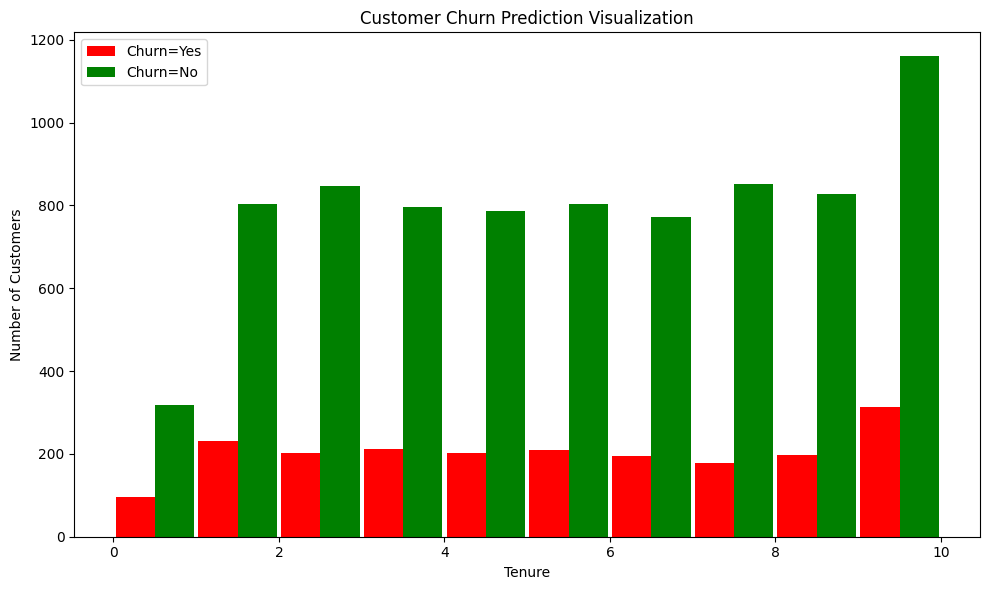

In [15]:
# Data for plotting
tenure_churn_no = df[df['Exited'] == 0]['Tenure']
tenure_churn_yes = df[df['Exited'] == 1]['Tenure']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])

# Adding labels and title
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

# Adding legend and adjusting layout
plt.legend()
plt.tight_layout()

# Displaying the plot
plt.show()

# **4. Feature Engineering:**

#### Making a new column BalanceSalaryRatio

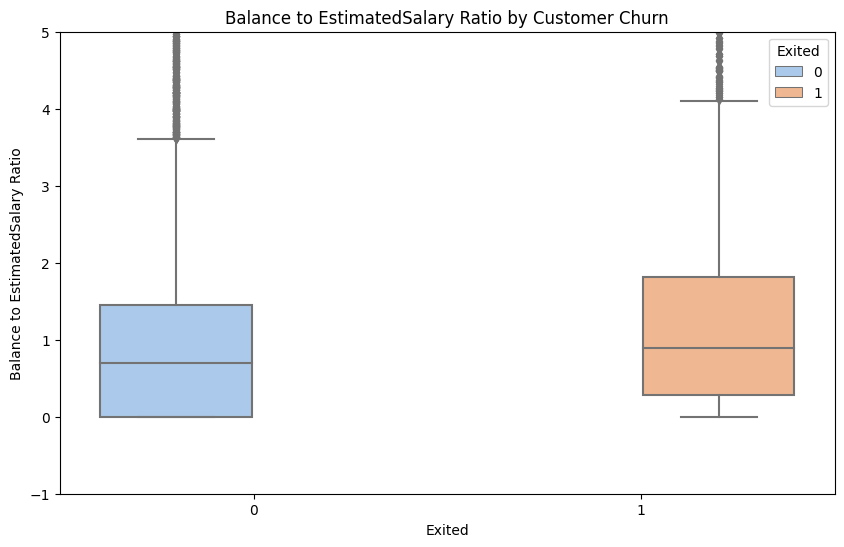

In [16]:
# Creating a new feature 'BalanceSalaryRatio'
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df, palette='pastel')
plt.title('Balance to EstimatedSalary Ratio by Customer Churn')
plt.xlabel('Exited')
plt.ylabel('Balance to EstimatedSalary Ratio')
plt.ylim(-1, 5)
plt.legend(title='Exited', loc='upper right')

# Displaying the plot
plt.show()

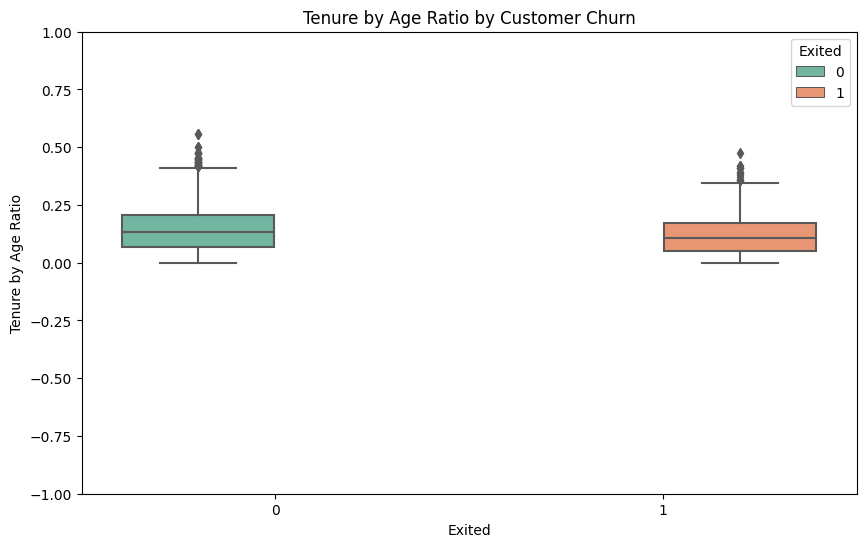

In [17]:
# Creating a new feature 'TenureByAge'
df['TenureByAge'] = df['Tenure'] / df['Age']

# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df, palette='Set2')
plt.title('Tenure by Age Ratio by Customer Churn')
plt.xlabel('Exited')
plt.ylabel('Tenure by Age Ratio')
plt.ylim(-1, 1)
plt.legend(title='Exited', loc='upper right')

# Displaying the plot
plt.show()

#### **Printing the categorical variables**

In [18]:
def print_unique_col_values(df):
    """
    Print unique values for each categorical column in the DataFrame.

    Parameters:
    - df: DataFrame

    Returns:
    None
    """
    for column in df:
        if df[column].dtype == 'O':  # Checking for object (categorical) data type
            unique_values = df[column].unique()
            num_unique = len(unique_values)
            if num_unique < 20:  # Limiting the display for columns with a large number of unique values
                print(f'{column} ({num_unique} unique values): {unique_values}')
            else:
                print(f'{column} has a large number of unique values and will not be displayed.')


In [19]:
print_unique_col_values(df)

Geography (3 unique values): ['France' 'Spain' 'Germany']
Gender (2 unique values): ['Female' 'Male']


#### **Label Encoding**

In [20]:
# Mapping 'Gender' to numeric values
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'].replace(gender_mapping, inplace=True)

#### **One Hot Encoding method:**

In [21]:
# Creating dummy variables for 'Geography' column
df1 = pd.get_dummies(df, columns=['Geography'])

In [22]:
# List of variables to be scaled
scale_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Using Min-Max scaling to scale selected variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [23]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [24]:
# Separating independent and dependent features
X = df1.drop('Exited', axis='columns')  # Independent features
y = df1['Exited']  # Dependent feature

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [32]:
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("y_train shape:", y_train.shape)

X_train_reshaped shape: (250, 32, 14)
y_train shape: (8000,)


In [35]:
# Assuming X_train has shape (number_of_samples, 14)
# Convert X_train to a NumPy array
X_train_array = X_train.to_numpy()

# Print the shapes for debugging
print("Original X_train shape:", X_train_array.shape)
print("Original y_train shape:", y_train.shape)

# Reshape it to add an additional dimension for the batch size
X_train_reshaped = X_train_array.reshape(-1, 14)  # Keep the same number of samples

# Print the reshaped shapes
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("y_train shape:", y_train.shape)

Original X_train shape: (8000, 14)
Original y_train shape: (8000,)
X_train_reshaped shape: (8000, 14)
y_train shape: (8000,)


# **5. Model Building and Prediction:**

## Understanding the Sequential Model

The Sequential model is well-suited for a straightforward stack of layers in which each layer possesses precisely one input tensor and one output tensor.

### When to Use the Sequential Model:

- **Single Input and Single Output:** The Sequential model is appropriate when your neural network architecture follows a linear stack structure with a single input tensor and a single output tensor.

### When Not to Use the Sequential Model:

- **Multiple Inputs or Outputs:** Avoid using the Sequential model when dealing with neural networks that have multiple inputs or multiple outputs.
- **Layers with Multiple Inputs or Outputs:** The Sequential model is not suitable if any of your layers involves multiple inputs or outputs.
- **Layer Sharing:** If you require layer sharing within your model architecture, the Sequential model may not be the best choice.
- **Non-Linear Topology:** For models with non-linear topology, such as those involving residual connections or multi-branch structures, it's advisable to explore other model architectures beyond the Sequential model.


#### **Model Building:**

In [36]:
import tensorflow as tf
from tensorflow import keras

# Define the Sequential model
model = keras.Sequential([
    # Input layer with 14 neurons and ReLU activation
    keras.layers.Dense(12, input_shape=(14,), activation='relu'),
    
    # Hidden layer with 6 neurons and ReLU activation
    keras.layers.Dense(6, activation='relu'),
    
    # Output layer with 1 neuron and Sigmoid activation for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data for 100 epochs
model.fit(X_train_reshaped, y_train, epochs=100)


Epoch 1/100


250/250 [==============================] - 3s 2ms/step - loss: 0.6913 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5053 - accuracy: 0.7929
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7964
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4650 - accuracy: 0.8045
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4442 - accuracy: 0.8099
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5003 - accuracy: 0.8025
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7972
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8060
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4315 - accuracy: 0.8091
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4283 - accu

In [37]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(X_test, y_test)

# Display the evaluation results
print(f'\nEvaluation Results - Loss: {evaluation_result[0]}, Accuracy: {evaluation_result[1]}')

63/63 [==============================] - 0s 2ms/step - loss: 0.3823 - accuracy: 0.8480

Evaluation Results - Loss: 0.3823409974575043, Accuracy: 0.8479999899864197


In [38]:
# Generate predictions on the test data
predictions = model.predict(X_test)

# Display the predictions
print("Predictions:")
predictions

63/63 [==============================] - 0s 2ms/step
Predictions:


array([[0.03483066],
       [0.10907593],
       [0.05948243],
       ...,
       [0.01780492],
       [0.0167871 ],
       [0.08620827]], dtype=float32)

In [39]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 2ms/step


array([[0.03483066],
       [0.10907593],
       [0.05948243],
       ...,
       [0.01780492],
       [0.0167871 ],
       [0.08620827]], dtype=float32)

#### **Converting our predictions to 0,1 to check accuracy:**

In [40]:
import numpy as np

# Assuming yp is the output from model.predict(X_test)
yp = model.predict(X_test)

# Use NumPy for element-wise comparison
y_pred = np.where(yp > 0.5, 1, 0)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


# **6. Model Evaluation:**

#### **Checking the accuracy:**

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_test and y_pred are available
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Confusion Matrix:
[[1493  102]
 [ 202  203]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.50      0.57       405

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


Accuracy: 0.848


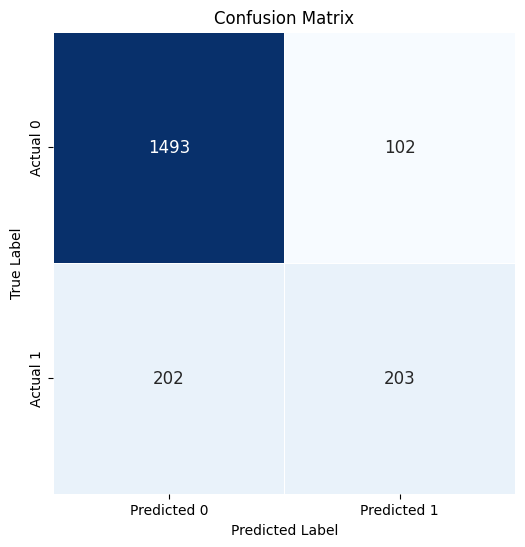

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 12}, linewidths=.5, square=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Actual 0', 'Actual 1'])
plt.show()

In [46]:
from sklearn.metrics import accuracy_score

# Assuming y_test and y_pred are available
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy Score: {accuracy:.2f}%")

Accuracy Score: 84.80%


# **7. Using AutoML:**

# **H2O Auto ML**

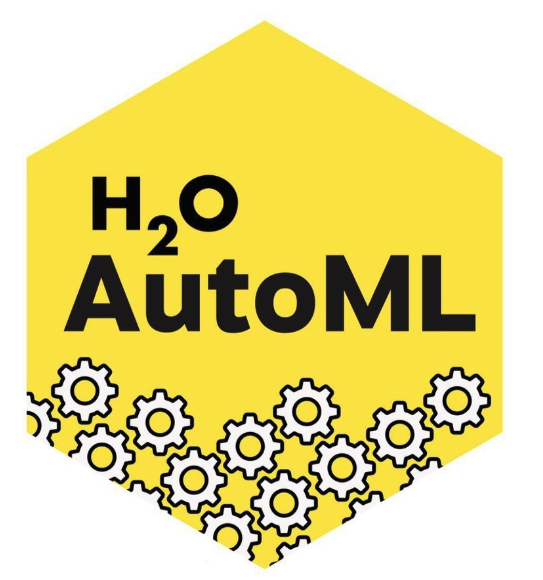

**H2O Overview:**
H2O is a comprehensive, open-source machine learning platform designed for distributed, in-memory processing with linear scalability. The platform encompasses a diverse set of statistical and machine learning algorithms, including but not limited to gradient boosted machines, generalized linear models, deep learning, and more


#### **Installing H2O Auto ML:**

In [47]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [48]:
!pip install h2o

     ---------------------------------------- 0.0/265.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/265.2 MB 1.4 MB/s eta 0:03:15
     ---------------------------------------- 0.1/265.2 MB 1.2 MB/s eta 0:03:39
     ---------------------------------------- 0.3/265.2 MB 1.8 MB/s eta 0:02:31
     ---------------------------------------- 0.5/265.2 MB 2.7 MB/s eta 0:01:39
     ---------------------------------------- 0.9/265.2 MB 3.9 MB/s eta 0:01:07
     ---------------------------------------- 1.3/265.2 MB 4.7 MB/s eta 0:00:56
     ---------------------------------------- 1.6/265.2 MB 5.1 MB/s eta 0:00:52
     ---------------------------------------- 1.6/265.2 MB 5.1 MB/s eta 0:00:52
     ---------------------------------------- 2.6/265.2 MB 6.4 MB/s eta 0:00:41
     ---------------------------------------- 2.8/265.2 MB 6.2 MB/s eta 0:00:43
      --------------------------------------- 3.3/265.2 MB 6.6 MB/s eta 0:00:40
      --------------------------------------- 3

**Initialization and Import of H2O Python Module and H2OAutoML Class:**
In this section, we initialize the H2O Python module and import the H2OAutoML class, laying the groundwork for leveraging H2O's automated machine learning capabilities


In [49]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Temurin-21.0.1+12 (build 21.0.1+12-LTS, mixed mode, sharing)
  Starting server from C:\Users\Sudheer Pulapa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SUDHEE~1\AppData\Local\Temp\tmp36zaxcac
  JVM stdout: C:\Users\SUDHEE~1\AppData\Local\Temp\tmp36zaxcac\h2o_Sudheer_Pulapa_started_from_python.out
  JVM stderr: C:\Users\SUDHEE~1\AppData\Local\Temp\tmp36zaxcac\h2o_Sudheer_Pulapa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_Sudheer_Pulapa_o8zs9q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


#### **Loading the data:**

In [50]:
df = h2o.import_file("D:\Bank+Customer+Churn-Auto+Keras+-Project+code+and+Files\Project code and Files\Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [51]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


#### **H2O auto ml can do all the data preprocessing techniques:**

In [52]:
df_train,df_test= df.split_frame(ratios=[.8])

#### **Splitting the data:**

In [53]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
12,1.57372e+07,Andrews,497,Spain,Male,24,3,0,2,1,0,76390,0
13,1.56323e+07,Kay,476,France,Female,34,10,0,2,1,0,26261,0
14,1.56915e+07,Chin,549,France,Female,25,5,0,2,0,0,190858,0


In [54]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

#### **Defining the model:**

In [55]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

#### **Fitting the model:**

In [56]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
14:28:58.532: Project: AutoML_1_20240113_142858
14:28:58.533: Setting stopping tolerance adaptively based on the training frame: 0.011194341570991126
14:28:58.534: Build control seed: 10
14:28:58.534: training frame: Frame key: AutoML_1_20240113_142858_training_py_3_sid_b690    cols: 14    rows: 7980  chunks: 48    size: 546838  checksum: -4426511410376635677
14:28:58.534: validation frame: NULL
14:28:58.535: leaderboard frame: NULL
14:28:58.535: blending frame: NULL
14:28:58.535: response column: Exited
14:28:58.535: fold column: null
14:28:58.535: weights column: null
14:28:58.542: AutoML: XGBoost is not available; skipping it.
14:28:58.546: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 1

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),5/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


#### **Seeing the Leaderboard:**

In [57]:
lb = aml.leaderboard

In [58]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240113_142858,0.315878,0.0997788,0.204724,0.221955,0.0997788
StackedEnsemble_BestOfFamily_1_AutoML_1_20240113_142858,0.316225,0.0999983,0.2051,0.222172,0.0999983
GBM_2_AutoML_1_20240113_142858,0.316996,0.100486,0.205946,0.222849,0.100486
GBM_5_AutoML_1_20240113_142858,0.318192,0.101246,0.206817,0.223428,0.101246
GBM_1_AutoML_1_20240113_142858,0.318937,0.101721,0.212425,0.224493,0.101721
GBM_3_AutoML_1_20240113_142858,0.319283,0.101942,0.208431,0.224489,0.101942
GBM_4_AutoML_1_20240113_142858,0.321725,0.103507,0.209072,0.226822,0.103507
GBM_grid_1_AutoML_1_20240113_142858_model_1,0.323629,0.104736,0.226106,0.227783,0.104736
DRF_1_AutoML_1_20240113_142858,0.324396,0.105233,0.211047,0.229391,0.105233
DeepLearning_1_AutoML_1_20240113_142858,0.330234,0.109055,0.217927,0.231462,0.109055


#### **Getting all the model ids:**

In [59]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

C:\Users\Sudheer Pulapa\AppData\Local\Programs\Python\Python311\Lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [60]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20240113_142858',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240113_142858',
 'GBM_2_AutoML_1_20240113_142858',
 'GBM_5_AutoML_1_20240113_142858',
 'GBM_1_AutoML_1_20240113_142858',
 'GBM_3_AutoML_1_20240113_142858',
 'GBM_4_AutoML_1_20240113_142858',
 'GBM_grid_1_AutoML_1_20240113_142858_model_1',
 'DRF_1_AutoML_1_20240113_142858',
 'DeepLearning_1_AutoML_1_20240113_142858',
 'XRT_1_AutoML_1_20240113_142858',
 'GLM_1_AutoML_1_20240113_142858']

In [61]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.11096168065006227
RMSE: 0.3331091122291047
MAE: 0.21463767516949891
RMSLE: 0.23312230690898636
Mean Residual Deviance: 0.11096168065006227
R^2: 0.33550926107682977
Null degrees of freedom: 2019
Residual degrees of freedom: 2012
Null deviance: 337.527165344439
Residual deviance: 224.1425949131258
AIC: 1309.399553732997

#### **Getting the model details for best performing model:**

In [62]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),5/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [63]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20240113_142858',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20240113_142858'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240113_142858_training_py_3_sid_b690',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240113_142858_training_py_3_sid_b690'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240113_142858_training_py_3_sid_b690',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240113_142858_training_py_3_sid_b690'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [64]:
#output.varimp_plot()

In [65]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),5/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [66]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [67]:
y_pred

predict
0.158575
0.113744
0.998243
0.00256981
0.20042
0.0138298
0.00766167
0.164702
0.376932
0.309144


## Model Details

### Stacked Ensemble Model
- **Model Key:** StackedEnsemble_AllModels_1_AutoML_1_20240113_142858
- **Stacking Strategy:** Cross-validation
- **Number of Base Models (Used / Total):** 7/10
  - GBM Base Models (Used / Total): 5/6
  - DRF Base Models (Used / Total): 1/2
  - DeepLearning Base Models (Used / Total): 1/1
  - GLM Base Models (Used / Total): 0/1
- **Metalearner Algorithm:** GLM
- **Metalearner Fold Assignment Scheme:** Random
- **Metalearner nfolds:** 2
- **Metalearner Fold Column:** None
- **Custom Metalearner Hyperparameters:** None

### ModelMetricsRegressionGLM: Stacked Ensemble (Reported on Train Data)
- **Mean Squared Error (MSE):** 0.0771
- **Root Mean Squared Error (RMSE):** 0.2777
- **Mean Absolute Error (MAE):** 0.1748
- **Root Mean Squared Logarithmic Error (RMSLE):** 0.1930
- **Mean Residual Deviance:** 0.0771
- **R-squared (R^2):** 0.5210
- **Null Deviance:** 1284.58
- **Residual Deviance:** 615.25
- **Akaike Information Criterion (AIC):** 2214.18

### ModelMetricsRegressionGLM: Stacked Ensemble (Reported on Cross-validation Data)
- **Mean Squared Error (MSE):** 0.0998
- **Root Mean Squared Error (RMSE):** 0.3159
- **Mean Absolute Error (MAE):** 0.2047
- **Root Mean Squared Logarithmic Error (RMSLE):** 0.2220
- **Mean Residual Deviance:** 0.0998
- **R-squared (R^2):** 0.3802
- **Null Deviance:** 1284.77
- **Residual Deviance:** 796.24
- **Akaike Information Criterion (AIC):** 4267.96

### Cross-Validation Metrics Summary:
| Metric | Mean | Standard Deviation | Fold 1 | Fold 2 |
|--------|------|---------------------|--------|--------|
| MAE | 0.2055 | 0.0035 | 0.2080 | 0.2030 |
| Mean Residual Deviance | 0.0998 | 0.0021 | 0.0982 | 0.1013 |
| MSE | 0.0998 | 0.0021 | 0.0982 | 0.1013 |
| Null Deviance | 642.39 | 21.02 | 627.52 | 657.25 |
| R-squared | 0.3803 | 0.00396 | 0.3830 | 0.3775 |
| Residual Deviance | 398.08 | 15.57 | 387.07 | 409.09 |
| RMSE | 0.3158 | 0.0034 | 0.3134 | 0.3182 |
| RMSLE | 0.2219 | 0.00025 | 0.2217 | 0.2221 |

### Tips
- Use `model.explain()` to inspect the model.
- Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Assessment of Model Performance:**
The stacked ensemble model demonstrates promising performance based on the provided details. It achieves competitive metrics on both training and cross-validation data, with relatively low error values and a reasonable R-squared value. Further evaluation using domain-specific criteria and additional analysis tools is recommended for a comprehensive understanding of its effectiveness.
